In [2]:
import os
from google.cloud import bigquery
import pandas as pd

# Authenticate BigQuery:

In [7]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = \
'D:/GoogleDrive/GoogleCloudServiceAccountsKey/BigQueryServiceAccountForJupyter/api-7223922200765231820-28682-14f1efc35761.json'

# Example: 1

In [16]:
query="""
SELECT
    departure_delay,
    COUNT(1) AS num_flights,
    APPROX_QUANTILES(arrival_delay, 5) AS arrival_delay_deciles
FROM
    `bigquery-samples.airline_ontime_data.flights`
GROUP BY
    departure_delay
HAVING
    num_flights > 100
ORDER BY
    departure_delay ASC
"""

In [17]:
df = bigquery.Client().query(query).to_dataframe()
df.head()

,departure_delay,num_flights,arrival_delay_deciles
0,-37.0,107,"[-66.0, -41.0, -30.0, -17.0, -3.0, 33.0]"
1,-36.0,139,"[-74.0, -39.0, -32.0, -18.0, -7.0, 49.0]"
2,-35.0,191,"[-68.0, -40.0, -28.0, -14.0, -4.0, 85.0]"
3,-34.0,195,"[-58.0, -40.0, -30.0, -19.0, -8.0, 39.0]"
4,-33.0,227,"[-59.0, -39.0, -32.0, -20.0, -7.0, 25.0]"


In [18]:
percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles = percentiles.rename(columns = lambda x : str(x*10) + "%")
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

,departure_delay,0%,10%,20%,30%,40%,50%
0,-37.0,-66.0,-41.0,-30.0,-17.0,-3.0,33.0
1,-36.0,-74.0,-39.0,-32.0,-18.0,-7.0,49.0
2,-35.0,-68.0,-40.0,-28.0,-14.0,-4.0,85.0
3,-34.0,-58.0,-40.0,-30.0,-19.0,-8.0,39.0
4,-33.0,-59.0,-39.0,-32.0,-20.0,-7.0,25.0


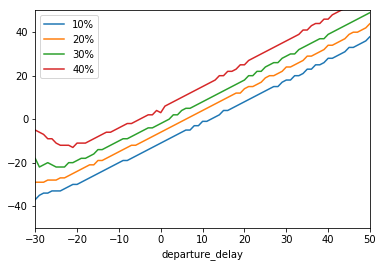

In [21]:
without_extremes = df.drop(['0%', '50%'], 1)
without_extremes.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));